# **Quiz 0701**

### "TensorFlow machine learning with Calilfornia housing data"

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from sklearn import metrics
from tensorflow.python.data import Dataset
from __future__ import print_function
import math

TensorFlow 1.x selected.


#### Answer the following question by providing Python code:

In [2]:
# Bring the data.
housing_data = fetch_california_housing()

In [3]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
data = pd.read_csv('housing.csv',sep=",")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
int(data.total_bedrooms.mean())

537

In [10]:
data = data.reindex(np.random.permutation(data.index))
data["median_house_value"] /= 1000.0
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12991,-121.25,38.70,16.0,3262.0,533.0,1794.0,543.0,4.2464,144.4,INLAND
20130,-118.92,34.40,23.0,1290.0,283.0,1060.0,279.0,3.3152,198.0,<1H OCEAN
17794,-121.82,37.37,42.0,2913.0,577.0,1873.0,580.0,3.7214,167.9,<1H OCEAN
9875,-121.83,36.62,33.0,1771.0,398.0,1037.0,388.0,2.7708,161.8,<1H OCEAN
5729,-118.23,34.17,37.0,4524.0,1005.0,2099.0,937.0,3.5781,366.7,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
17464,-119.88,34.42,22.0,2367.0,492.0,1333.0,488.0,3.6304,312.2,NEAR OCEAN
10085,-117.95,33.94,28.0,2851.0,496.0,1287.0,496.0,5.0782,264.1,<1H OCEAN
7353,-118.15,33.96,33.0,1201.0,340.0,1482.0,334.0,2.4821,150.0,<1H OCEAN
1829,-122.32,37.92,22.0,1119.0,220.0,565.0,199.0,3.3594,186.9,NEAR BAY


In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206.855817
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115.395616
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119.600000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179.700000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264.725000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

# Preprocess 

In [12]:
# Define the input feature
input = data[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [13]:
# Define the label.
targets = data.median_house_value

In [14]:
# Use gradient descent as the optimizer for training the model.
opt=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
opt= tf.contrib.estimator.clip_gradients_by_norm(opt, 5.0)


linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=opt
)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp885vo0zl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_tim

# Build a linear regression model & Train the model.

In [15]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

# Build a linear regression model & Train the model.

In [16]:
linear_regressor.train(
    input_fn = lambda:my_input_fn(input, targets),
    steps=100
)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp885vo0zl/

In [20]:
prediction_input_fn =lambda: my_input_fn(input, targets, num_epochs=1, shuffle=False)

predictions = linear_regressor.predict(input_fn=prediction_input_fn)

predictions = np.array([item['predictions'][0] for item in predictions])

#MSE / RMSE
MSE = metrics.mean_squared_error(predictions, targets)
RMSE = math.sqrt(MSE)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp885vo0zl/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [21]:
print("MSE : ", MSE)
print("RMSE : ", RMSE)

MSE :  56046.961843689285
RMSE :  236.74239553508215


In [22]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,20640.000000,20640.000000
mean,0.131788,206.855817
std,0.109080,115.395616
min,0.000100,14.999000
25%,0.072388,119.600000
50%,0.106350,179.700000
75%,0.157400,264.725000
max,1.965999,500.001000


In [23]:
sample =data.sample(n=300)

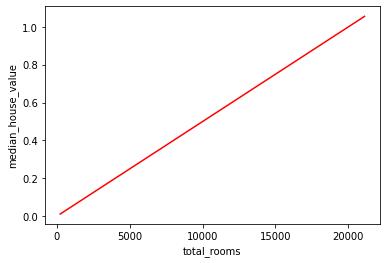

In [25]:
# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Display graph.
plt.show()